In [3]:
import gymnasium as gym
import flappy_bird_gymnasium
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.callbacks import BaseCallback, CheckpointCallback
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import os

# 2-Policy gradient

Run to plot the evolution according to different parameters


In [4]:
def plot_training_progress(log_files, labels):
    plt.figure(figsize=(10, 5))
    colors = plt.cm.viridis(np.linspace(0, 1, len(log_files)))  # Generate distinct colors
    for log_file, label, color in zip(log_files, labels, colors):
        df = pd.read_csv(log_file)
        best_rewards = df["Best Reward"].cummax()  # Cumulative maximum of best rewards
        plt.plot(df["Total Steps"], best_rewards, label=f"{label} Best Score", color=color, alpha=0.6)
        # plt.plot(df["Total Steps"], df["Avg Reward"], label=f"{label} Average Score", color=color, linestyle='--', alpha=0.6)
    plt.xlabel("Training Steps")
    plt.ylabel("Score")
    plt.title("Training Progress")
    plt.legend()
    # plt.savefig("entropy comparison.png")
    plt.show()



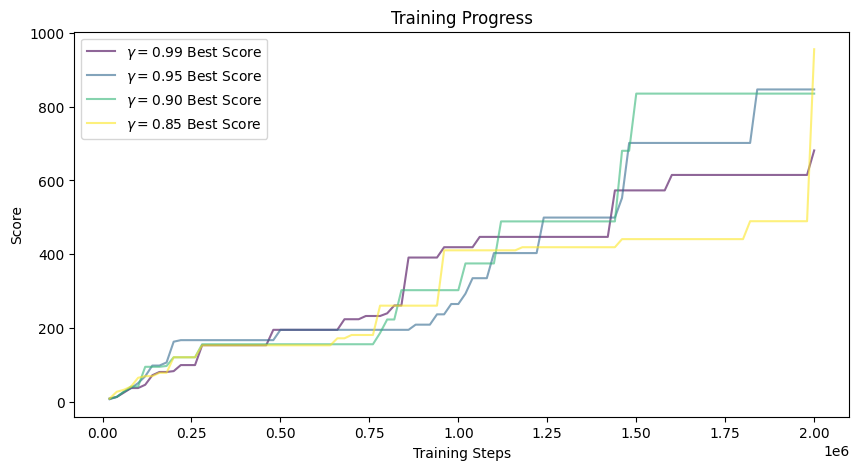

In [5]:
log_files_gamma = ["Policy_gradient/param1.csv", "Policy_gradient/param2.csv", "Policy_gradient/param3.csv", "Policy_gradient/param4.csv"]
labels_gamma = [r"$\gamma=0.99$", r"$\gamma=0.95$", r"$\gamma=0.90$", r"$\gamma =0.85$"]

log_files_layers=["Policy_gradient/param11.csv","Policy_gradient/param1.csv", "Policy_gradient/param5.csv", "Policy_gradient/param6.csv", "Policy_gradient/param7.csv"]
labels_layers=[r"2 layers 16 units",r"2 layers 64 units", r"2 layers 128 units", r"3 layers 64 units", r"3 layers 32 units" ]

log_files_ent=["Policy_gradient/param1.csv", "Policy_gradient/param8.csv", "Policy_gradient/param9.csv", "Policy_gradient/param10.csv"]
labels_ent=[r"Entropy Coef = 0.0", r"Entropy Coef = 0.01", r"Entropy Coef = 0.02", r"Entropy Coef = 0.03"]

plot_training_progress(log_files_gamma, labels_gamma)

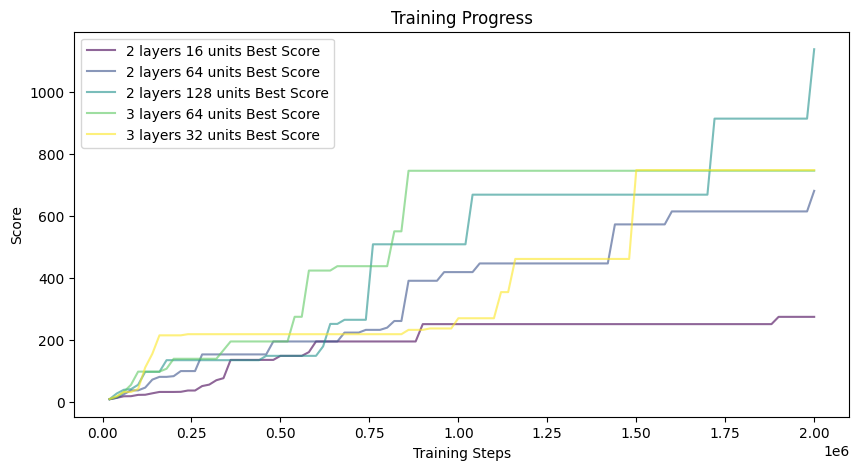

In [6]:
plot_training_progress(log_files_layers, labels_layers)

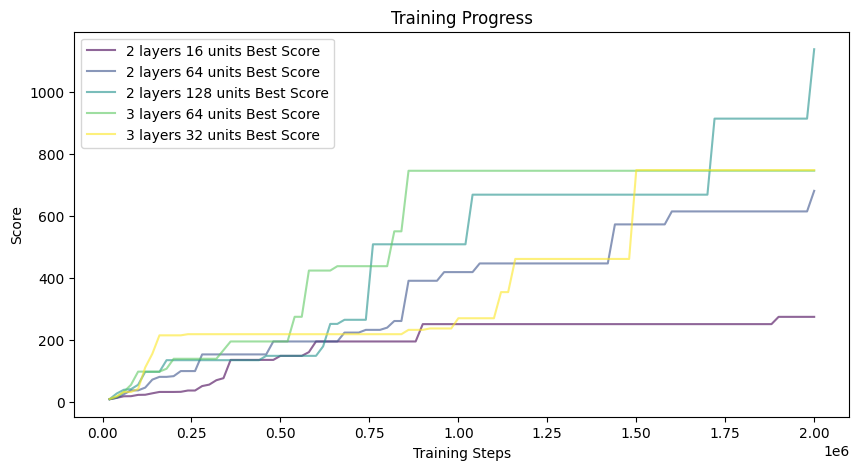

In [7]:
plot_training_progress(log_files_layers, labels_layers)

Test one of the best policies
It shows high variance, so you can test it several times

In [8]:
path = "/Users/martindrieux/Documents/GitHub/RL-3A-flappy-bird/Policy_gradient/Best_weights.zip"  # Change to "ppo_flappybird_final" to test last model

env = gym.make("FlappyBird-v0", render_mode="human", use_lidar=False)
model_ppo = PPO.load(path)  # Load selected model

obs, _ = env.reset()
done = False

while not done:
    action, _ = model_ppo.predict(obs)  # Get action from policy
    obs, reward, done, truncated, info = env.step(action)  # Take action in the env
    env.render()  # Render the game

env.close()